# Analysis of Movie Dataset

In this analysis, we explore a dataset containing information about movies. The goal is to uncover insights and trends within the data to understand factors influencing movie performance.

<h3> Import Libraries and Load Data

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset
df=pd.read_csv('movies.csv')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


## Data Exploration

- Summary statistics:
- Distribution of genres:
- Handling missing values:

In [3]:
df.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [5]:
for col in df.columns:
    missed_data=np.mean(df[col].isnull())
    print('{} - {}% '.format(col,missed_data))

name - 0.0% 
rating - 0.010041731872717789% 
genre - 0.0% 
year - 0.0% 
released - 0.0002608242044861763% 
score - 0.0003912363067292645% 
votes - 0.0003912363067292645% 
director - 0.0% 
writer - 0.0003912363067292645% 
star - 0.00013041210224308815% 
country - 0.0003912363067292645% 
budget - 0.2831246739697444% 
gross - 0.02464788732394366% 
company - 0.002217005738132499% 
runtime - 0.0005216484089723526% 


In [6]:
df['rating']=df['rating'].fillna(df['rating'].mode()[0])
df['company']=df['company'].fillna(df['company'].mode()[0])
df['writer']=df['writer'].fillna(df['writer'].mode()[0])
df['star']=df['star'].fillna(df['star'].mode()[0])
df['score']=df['score'].fillna(df['score'].mean())
df['votes']=df['votes'].fillna(df['votes'].mean())
df['budget']=df['budget'].fillna(df['budget'].mean())
df['gross']=df['gross'].fillna(df['gross'].mean())
df['released']=df['released'].fillna(df['released'].mode()[0])
df['runtime']=df['runtime'].fillna(df['runtime'].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7668 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7668 non-null   object 
 5   score     7668 non-null   float64
 6   votes     7668 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7668 non-null   object 
 9   star      7668 non-null   object 
 10  country   7665 non-null   object 
 11  budget    7668 non-null   float64
 12  gross     7668 non-null   float64
 13  company   7668 non-null   object 
 14  runtime   7668 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [7]:

for col in df:
    if df[col].dtype == 'object':  # Check if the column datatype is object
        df[col] = df[col].astype('category')  # Convert the column to category datatype

# Check the updated datatypes after conversion
print(df.dtypes)

name        category
rating      category
genre       category
year           int64
released    category
score        float64
votes        float64
director    category
writer      category
star        category
country     category
budget       float64
gross        float64
company     category
runtime      float64
dtype: object


In [8]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [9]:
df['budget']=df['budget'].astype('int64')
df['gross']=df['gross'].astype('int64')

In [10]:
df=df.sort_values(by=['gross'],inplace=False,ascending=False)

In [11]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,"Love, Honor and Obey",R,Comedy,2000,"February 9, 2001 (United States)",6.5,5200.0,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,35589876,1400,British Broadcasting Corporation (BBC),103.0
7625,The Untold Story,R,Comedy,2019,"January 11, 2019 (United States)",5.7,320.0,Shane Stanley,Lee Stanley,Miko Hughes,United States,35589876,790,Visual Arts Entertainment,104.0
7580,Run with the Hunted,Not Rated,Crime,2019,"June 26, 2020 (United States)",5.2,735.0,John Swab,John Swab,Ron Perlman,United States,35589876,682,Roxwell Films,93.0
2417,Madadayo,R,Drama,1993,"April 17, 1993 (Japan)",7.3,5100.0,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134.0


## Questions 
1. What are the key variables in the dataset, and how do they relate to each other?
2. What is the distribution of genres, ratings, release dates, and other important features in the dataset?
3. What are the trends or patterns in movie release dates over time?
4. How do different genres perform in terms of ratings and box office revenue?
5. Can we identify any correlations between variables such as budget and revenue, or runtime and ratings?

## 
1. What are the key variables in the dataset, and how do they relate to each other?


In [12]:
#numerical Columns
df.columns
X=df[['year','score','budget','runtime','votes','gross']]
X.corr()

,year,score,budget,runtime,votes,gross
year,1.000000,0.097936,0.265578,0.120766,0.222810,0.252042
score,0.097936,1.000000,0.064541,0.399329,0.409182,0.182868
budget,0.265578,0.064541,1.000000,0.265287,0.421007,0.711270
runtime,0.120766,0.399329,0.265287,1.000000,0.309166,0.241335
votes,0.222810,0.409182,0.421007,0.309166,1.000000,0.628713
gross,0.252042,0.182868,0.711270,0.241335,0.628713,1.000000


<Axes: xlabel='score', ylabel='gross'>

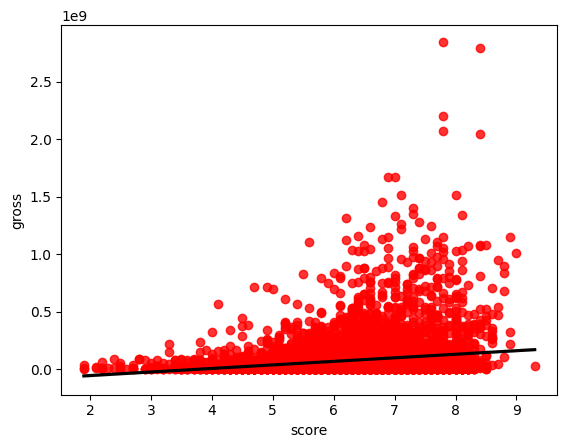

In [13]:
sns.regplot(x='score',y='gross',data=df,scatter_kws={'color':'red'},line_kws={'color':'black'})

Text(95.72222222222221, 0.5, 'Movie Features')

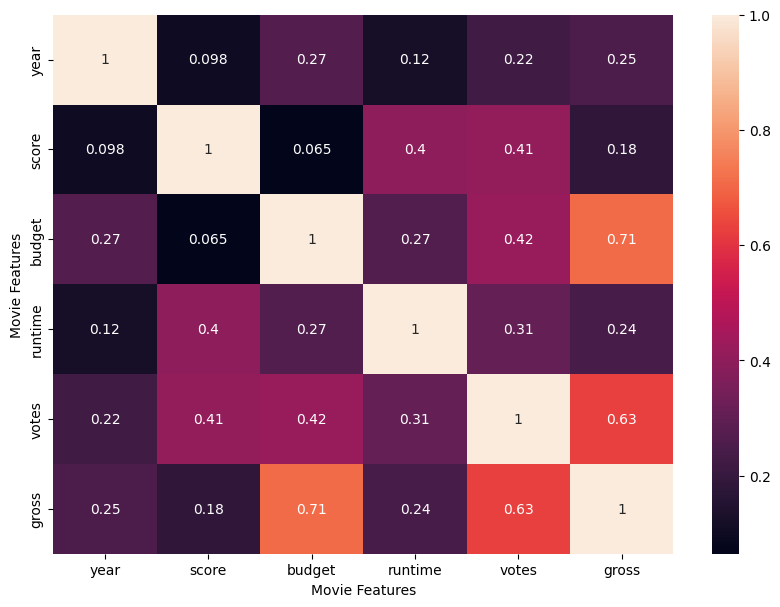

In [14]:
plt.figure(figsize=(10,7))
sns.heatmap(X.corr(),annot=True)
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

In [15]:
df.apply(lambda x: x.factorize()[0]).corr(method='pearson')


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,0.318036,0.135425,0.202910,0.634859,0.087005,0.555100,0.686878,0.763861,0.619791,0.158982,0.107674,0.978701,0.653213,0.061315
rating,0.318036,1.000000,-0.013987,0.038749,0.246598,-0.068913,0.139789,0.242909,0.266376,0.263987,0.184551,0.081835,0.325108,0.292609,0.028616
genre,0.135425,-0.013987,1.000000,0.087749,0.091492,0.061699,0.148525,0.095952,0.085771,0.103795,-0.075582,0.096540,0.129274,0.060106,0.003107
year,0.202910,0.038749,0.087749,1.000000,0.280435,0.078442,0.308671,0.119409,0.164949,0.183629,-0.062661,0.056780,0.211864,0.072907,0.032084
released,0.634859,0.246598,0.091492,0.280435,1.000000,0.059453,0.416831,0.464791,0.514005,0.433735,0.140583,0.074714,0.646963,0.423397,0.037269
score,0.087005,-0.068913,0.061699,0.078442,0.059453,1.000000,0.219365,0.134505,0.084896,0.089907,-0.103965,-0.000367,0.091294,0.010093,0.037753
votes,0.555100,0.139789,0.148525,0.308671,0.416831,0.219365,1.000000,0.446898,0.479554,0.406942,0.040421,0.030968,0.567149,0.347955,0.066713
director,0.686878,0.242909,0.095952,0.119409,0.464791,0.134505,0.446898,1.000000,0.660288,0.519710,0.163763,0.048193,0.702682,0.555189,0.067688
writer,0.763861,0.266376,0.085771,0.164949,0.514005,0.084896,0.479554,0.660288,1.000000,0.539022,0.170647,0.061861,0.778892,0.564320,0.044172
star,0.619791,0.263987,0.103795,0.183629,0.433735,0.089907,0.406942,0.519710,0.539022,1.000000,0.201206,0.059138,0.635116,0.515123,0.066050


Text(95.72222222222221, 0.5, 'Movie Features')

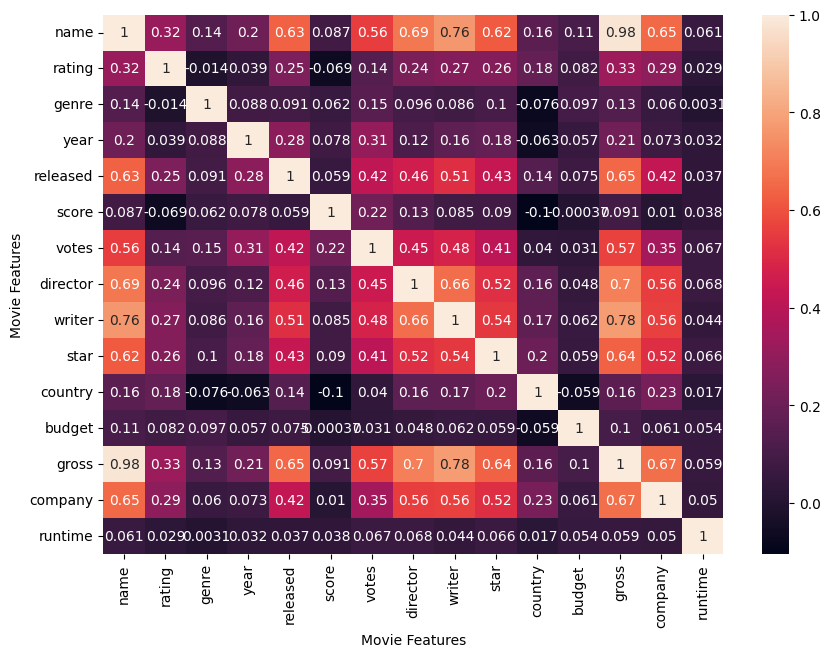

In [16]:
plt.figure(figsize=(10,7))
sns.heatmap(df.apply(lambda x: x.factorize()[0]).corr(method='pearson')
,annot=True)
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

##
2.What is the distribution of genres, ratings, release dates, and other important features in the dataset?

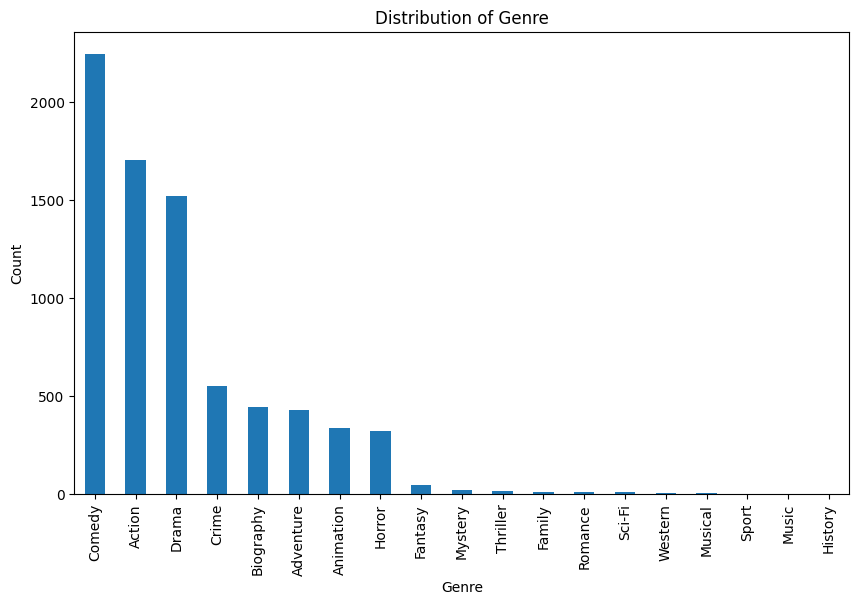

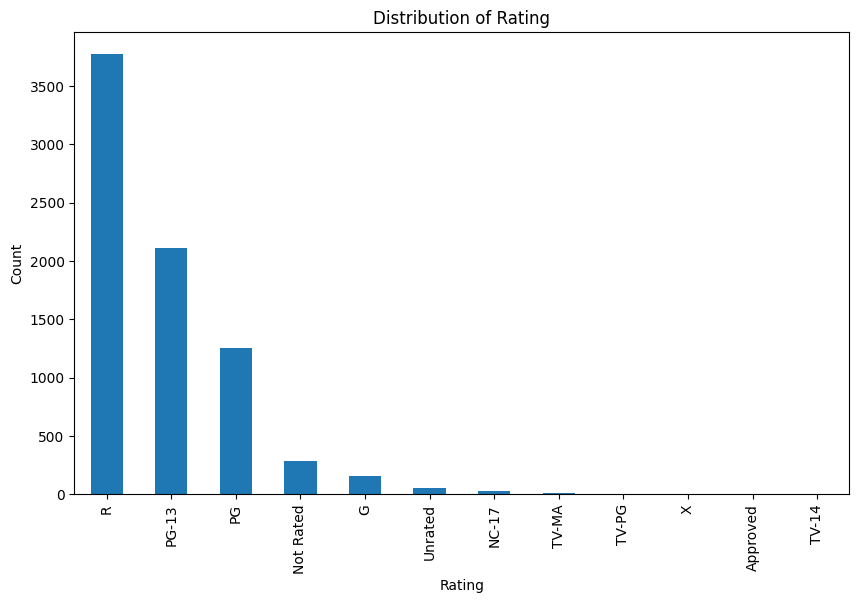

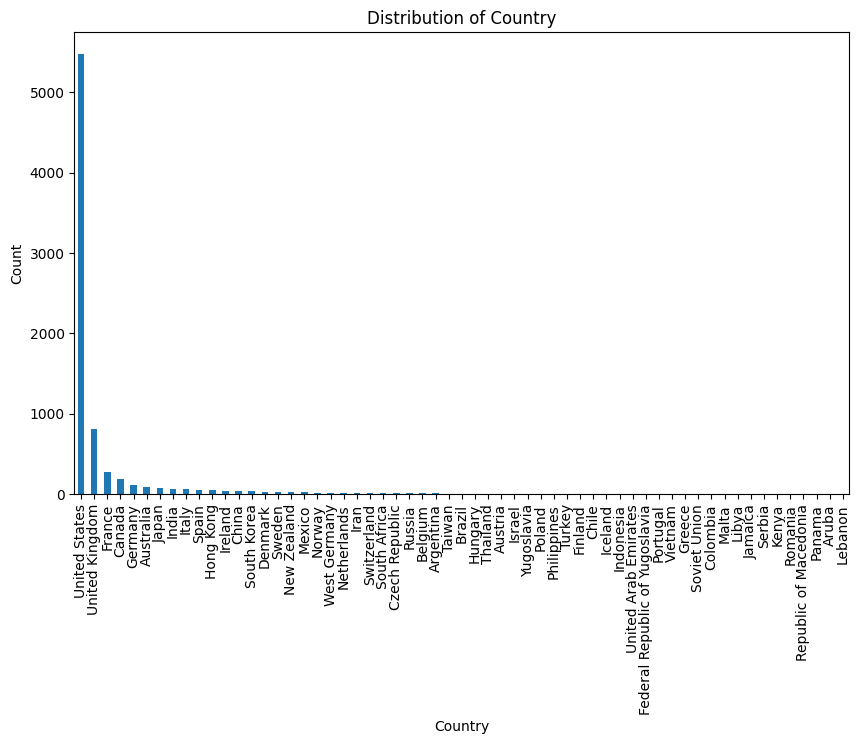

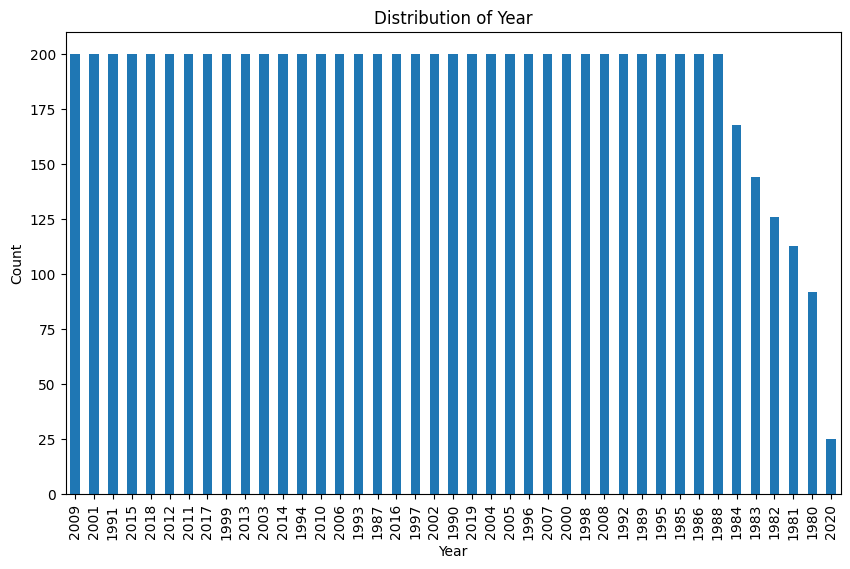

In [26]:
# List of categorical columns
categorical_columns = ['genre','rating','country','year']  
# Create histograms for each categorical column
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    df[column].value_counts().sort_values(ascending=False).plot(kind='bar')
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel(column.capitalize())
    plt.ylabel('Count')
    plt.show()

3. What are the trends or patterns in movie release dates over time?

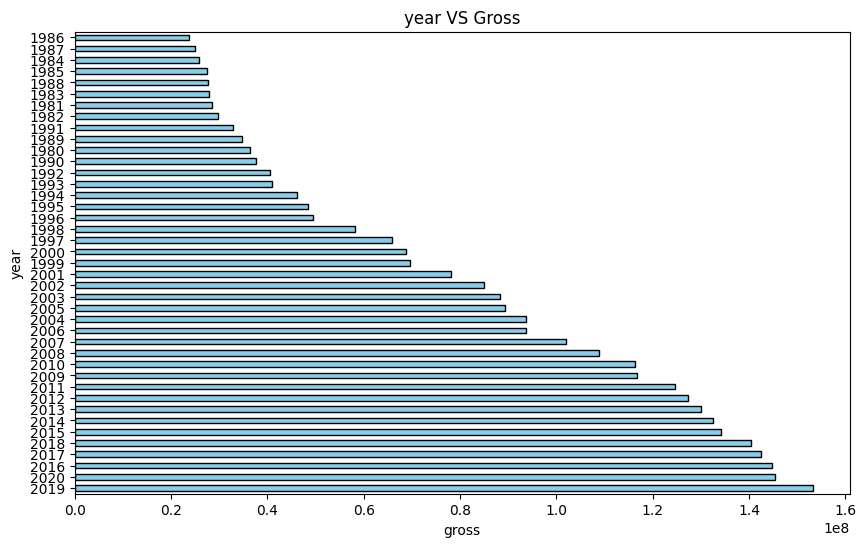

In [19]:

plt.figure(figsize=(10, 6))
df.groupby(by='year')['gross'].mean().sort_values(ascending=False).plot(kind='barh',color='skyblue', edgecolor='black')
plt.title('year VS Gross')
plt.xlabel('gross')
plt.ylabel('year')
plt.show()

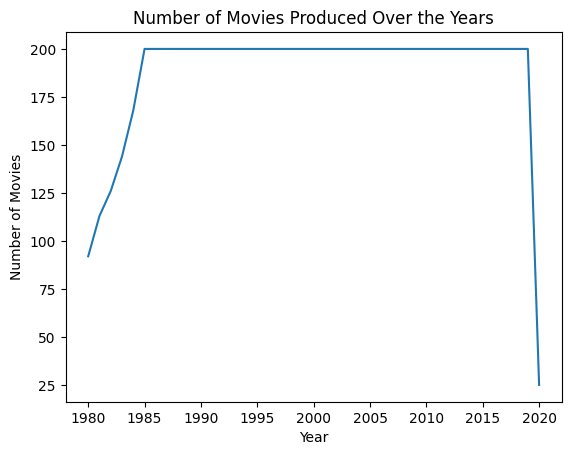

In [25]:
movies_per_year = df['year'].value_counts().sort_index()
movies_per_year.plot(kind='line')
plt.title('Number of Movies Produced Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

4. How do different genres perform in terms of ratings and box office revenue?

C:\Users\Aboukelila\AppData\Local\Temp\ipykernel_10688\1162605616.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(by='genre')['gross'].mean().sort_values(ascending=False).plot(kind='barh',color='skyblue', edgecolor='black')


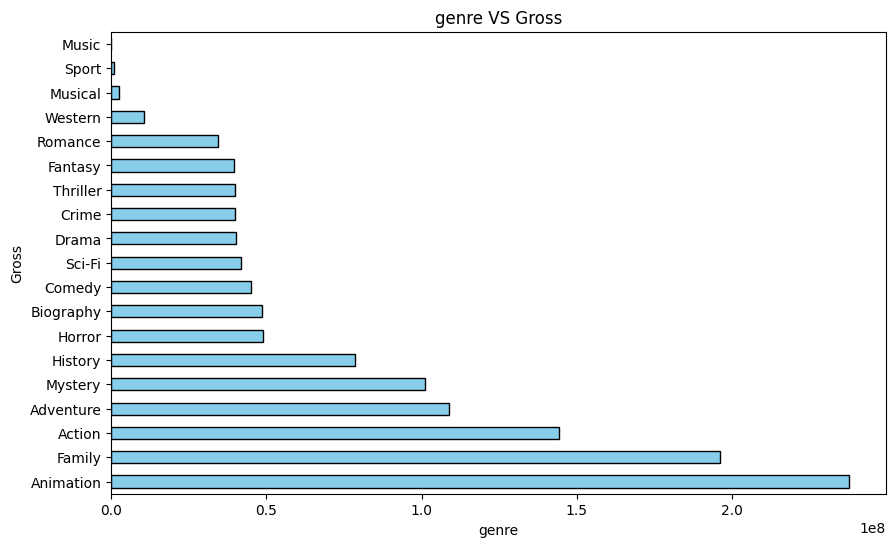

In [20]:
plt.figure(figsize=(10, 6))
df.groupby(by='genre')['gross'].mean().sort_values(ascending=False).plot(kind='barh',color='skyblue', edgecolor='black')
plt.title('genre VS Gross')
plt.xlabel('genre')
plt.ylabel('Gross')
plt.show()

5. Can we identify any correlations between variables such as budget and revenue, or runtime and ratings?


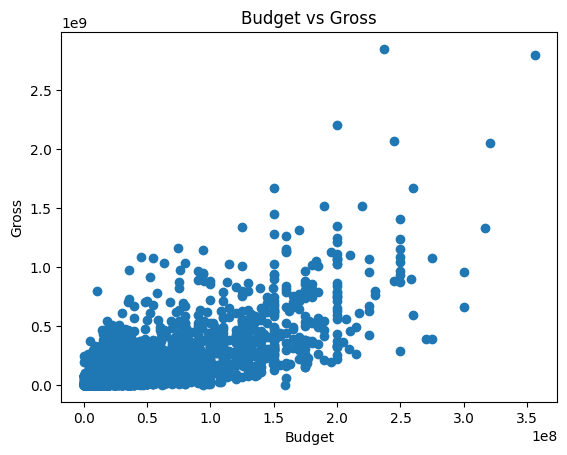

In [21]:
plt.scatter(x='budget',y='gross',data=df)

plt.title('Budget vs Gross')
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.show()

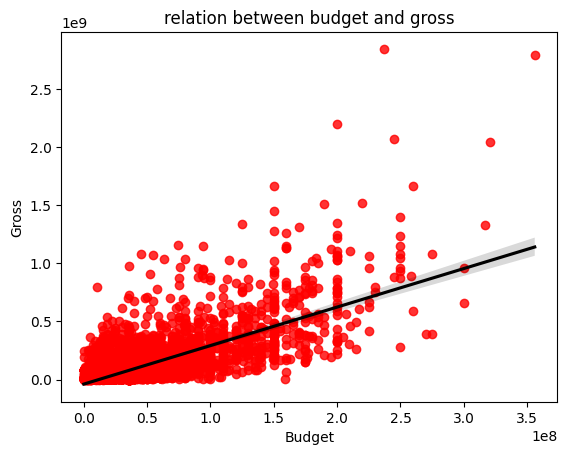

In [22]:
sns.regplot(x='budget',y='gross',data=df,scatter_kws={'color':'red'},line_kws={'color':'black'})
plt.title('relation between budget and gross')
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.show()

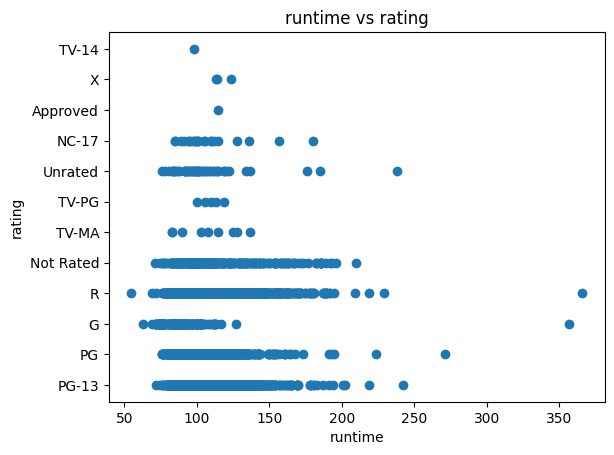

In [23]:
plt.scatter(x='runtime',y='rating',data=df)

plt.title('runtime vs rating')
plt.xlabel('runtime')
plt.ylabel('rating')
plt.show()

In [91]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,"Love, Honor and Obey",R,Comedy,2000,"February 9, 2001 (United States)",6.5,5200.0,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,35589876,1400,British Broadcasting Corporation (BBC),103.0
7625,The Untold Story,R,Comedy,2019,"January 11, 2019 (United States)",5.7,320.0,Shane Stanley,Lee Stanley,Miko Hughes,United States,35589876,790,Visual Arts Entertainment,104.0
7580,Run with the Hunted,Not Rated,Crime,2019,"June 26, 2020 (United States)",5.2,735.0,John Swab,John Swab,Ron Perlman,United States,35589876,682,Roxwell Films,93.0
2417,Madadayo,R,Drama,1993,"April 17, 1993 (Japan)",7.3,5100.0,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134.0


## Additional ML model 

In [32]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding
label_encoder = LabelEncoder()
df['genre_encoded'] = label_encoder.fit_transform(df['genre'])

df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,genre_encoded
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,6
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,"Love, Honor and Obey",R,Comedy,2000,"February 9, 2001 (United States)",6.5,5200.0,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,35589876,1400,British Broadcasting Corporation (BBC),103.0,4
7625,The Untold Story,R,Comedy,2019,"January 11, 2019 (United States)",5.7,320.0,Shane Stanley,Lee Stanley,Miko Hughes,United States,35589876,790,Visual Arts Entertainment,104.0,4
7580,Run with the Hunted,Not Rated,Crime,2019,"June 26, 2020 (United States)",5.2,735.0,John Swab,John Swab,Ron Perlman,United States,35589876,682,Roxwell Films,93.0,5
2417,Madadayo,R,Drama,1993,"April 17, 1993 (Japan)",7.3,5100.0,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134.0,6


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Features and target variable
features = df[['budget', 'runtime', 'genre_encoded']]  # Ensure categorical data is encoded properly
target = df['gross']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Model training
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predictions and evaluation
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 1.3887784045486096e+16
